In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline

from wordcloud import WordCloud

# Solve warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [105]:
df = pd.read_csv('../csv/Hotel_Reviews.csv')

In [106]:
df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


Text(0, 0.5, 'Density')

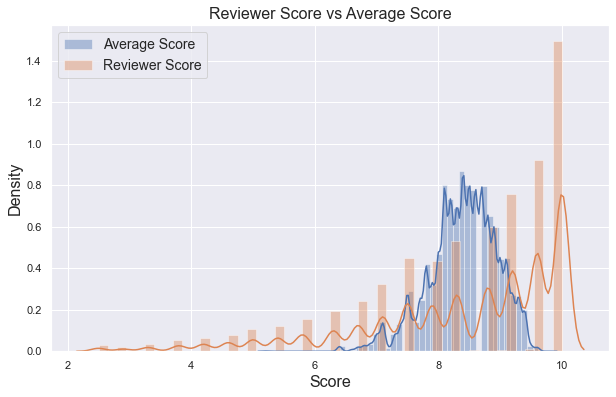

In [107]:
ax = plt.figure(figsize=(10,6))

sns.distplot(df.Average_Score, label='Average Score')
sns.distplot(df.Reviewer_Score, label='Reviewer Score')
plt.legend(fontsize=14)
plt.title("Reviewer Score vs Average Score", fontsize=16)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Density', fontsize=16)

In [120]:
df1 = df.groupby(by=['Reviewer_Nationality']).describe()
df2 = df1['Reviewer_Score'].nlargest(10,'count')

No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

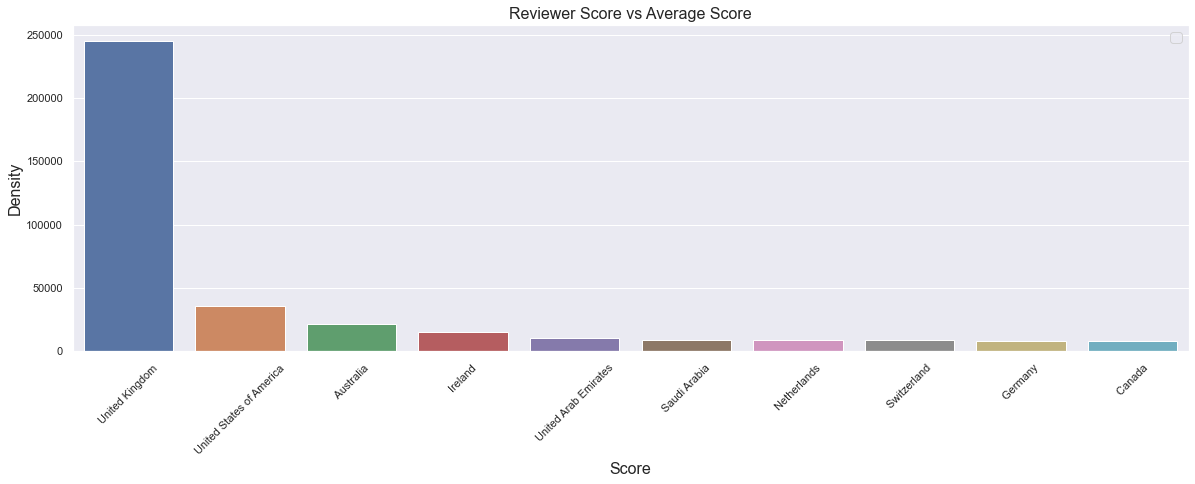

In [124]:
ax = plt.figure(figsize=(20,6))

sns.barplot(df2.index, df2['count'])
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
plt.xticks(rotation=45)
plt.legend(fontsize=14)
plt.title("Reviewer Score vs Average Score", fontsize=16)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Density', fontsize=16)

In [103]:
df1[['Average_Score']]

Average_Score                                        \
                             count      mean       std  min    25%   50%   
Reviewer_Nationality                                                       
                             523.0  8.330019  0.565141  6.4  8.000  8.40   
 Abkhazia Georgia            153.0  8.371895  0.572099  6.4  8.100  8.40   
 Afghanistan                   8.0  8.225000  0.817225  6.8  7.750  8.60   
 Albania                     286.0  8.330769  0.533539  6.6  8.100  8.40   
 Algeria                     100.0  8.317000  0.552689  7.0  8.000  8.40   
...                            ...       ...       ...  ...    ...   ...   
 Vietnam                     187.0  8.324599  0.582204  5.2  8.100  8.40   
 Wallis and Futuna             2.0  8.300000  0.707107  7.8  8.050  8.30   
 Yemen                        16.0  8.500000  0.430504  7.8  8.325  8.55   
 Zambia                       37.0  8.335135  0.538628  7.1  8.100  8.30   
 Zimbabwe                     51.0  8.290196  0.548910  6.8  7.900  8.20   

                                 
                       75%  max  
Reviewer_Nationality             
                      8.70  9.6  
 Abkhazia Georgia     8.70  9.6  
 Afghanistan          8.70  9.2  
 Albania              8.70  9.4  
 Algeria              8.70  9.3  
...                    ...  ...  
 Vietnam              8.70  9.4  
 Wallis and Futuna    8.55  8.8  
 Yemen                8.80  9.2  
 Zambia               8.70  9.5  
 Zimbabwe             8.80  9.2  

[227 rows x 8 columns]

In [58]:
df1.nlargest(10, 'Average_Score')

,Reviewer_Nationality,Average_Score
54717,United States of America,9.8
54718,Taiwan,9.8
54719,Poland,9.8
54720,South Africa,9.8
54721,Qatar,9.8
54722,United Kingdom,9.8
54723,United Kingdom,9.8
54724,Australia,9.8
54725,United States of America,9.8
54726,United States of America,9.8


In [50]:
plt.bar(country['Average_Score'].nlargest())

TypeError: bar() missing 1 required positional argument: 'height'

In [17]:
# Let's make some word clouds!
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [23]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 20]

# brands = ['Apple', 'Google', 'Other']

# Create subplots for dataframe before data cleaning

for index, brand in enumerate(df.Negative_Review):
    wc.generate(df.Negative_Review)

    plt.subplot(1, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(brands[index]+'\nBefore Data Cleaning' ,fontsize=22)
    plt.savefig('mytable.png')
plt.show()

# # Create subplots after data cleaning
# for index, brand in enumerate(tk_tweet.columns):
#     wc.generate(data_clean.clean_tweets[brand])

#     plt.subplot(1, 3, index+1)
#     plt.imshow(wc, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(brands[index]+'\nCleaned Data', fontsize=22) 
#     plt.savefig('mytable.png')
# plt.show()

# # Create subplots after removing non-English words
# for index, brand in enumerate(tk_tweet.columns):
#     wc.generate(data_english.only_english_words[brand])

#     plt.subplot(1, 3, index+1)
#     plt.imshow(wc, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(brands[index]+'\nOnly Words in English', fontsize=24)
#     plt.savefig('mytable.png')
# plt.show() 

TypeError: expected string or bytes-like object